In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-3.868145803153766 85.23350324072027
-5.949888098264054 50.82276385005042
-89.4747788103546 141.563361408712
-58.04351302438655 78.90831323556529
-88.5912532752446 -126.61768750729637
69.93119518926372 0.29618650654435896
1.1522603570202108 44.6570422663377
69.09754235212608 -53.300917756444264
76.80364083813572 47.8075655594555
-72.32569901684148 106.95862824972
-69.0866709218722 -6.806861504674345
44.022896473292775 -104.31372110589088
-7.420840711358892 -118.61301650134334
-57.46987279796807 -67.36306700505672
46.76870655189856 15.224537599959007
48.43837043561558 -113.59393405753404
-42.876809226944225 27.130171201855404
-68.65862753809898 169.15982709751216
33.18640557694316 -143.89549800053578
-25.175654015128075 48.24503436898189
81.51219413358513 115.72466460151628
-49.13625502632102 -74.36606788889988
-63.963843847179646 -44.41625661321402
-2.8929374401206047 15.501599497173089
-39.01467767881526 -109.99166583584905
77.49327472530192 -128.58043437632026
-25.48605744363924 169.

-16.25856327037893 19.912548233015485
-9.545659577808891 -104.71429594020901
-82.64088022637851 85.33533538751703
-11.825787608493854 -128.483120719829
-59.99383854896631 -41.53580569578193
-59.62909774707683 146.9832639807235
-20.796968122865906 35.34120465051629
64.96220115742199 -139.19189533677692
-44.38368509592119 -10.616422178832522
-42.25002140534617 105.14339525269492
18.91339291581896 -163.16584931812022
88.69348624408846 77.76697972618808
9.54863959548338 126.91309762430132
-11.259956942575997 62.52796865243218
46.91001972039811 -18.708444180172734
-9.9998412601756 -100.3392456355349
50.094780597158916 123.78147082595825
-30.88364851645258 145.39006028034993
29.621494306335066 -117.04911658113785
-54.060134002982274 126.94972862398606
-57.34509140518692 -164.1763105441283
-67.24004634517354 159.66182331223905
46.93348450392537 -161.8401177986104
25.84615538065171 -8.598343287261997
4.533492132276251 -107.6040788224812
-18.94763224798163 137.64141025592664
-10.663631688857308

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Get the nearest city using the citipy module
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a682da094de596c3a11cf7ee722f1a7a


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hambantota
Processing Record 2 of Set 13 | victoria
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | souillac
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | raudeberg
Processing Record 7 of Set 13 | barawe
City not found. Skipping...
Processing Record 8 of Set 13 | aasiaat
Processing Record 9 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 13 | albany
Processing Record 11 of Set 13 | cape town
Processing Record 12 of Set 13 | spearfish
Processing Record 13 of Set 13 | atuona
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | deutschlandsberg
Processing Record 16 of Set 13 | whitefish
Processing Record 17 of Set 13 | port elizabeth
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | hilo
Processing Record 20 of Set 13 | taolanaro
City not found. Skipping...
Processing Record

Processing Record 29 of Set 16 | hornepayne
Processing Record 30 of Set 16 | beyneu
Processing Record 31 of Set 16 | hofn
Processing Record 32 of Set 16 | progress
Processing Record 33 of Set 16 | mandla
Processing Record 34 of Set 16 | gorele
Processing Record 35 of Set 16 | one hundred mile house
City not found. Skipping...
Processing Record 36 of Set 16 | jiroft
City not found. Skipping...
Processing Record 37 of Set 16 | san ciro de acosta
Processing Record 38 of Set 16 | cherskiy
Processing Record 39 of Set 16 | rocha
Processing Record 40 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 16 | sao gabriel da cachoeira
Processing Record 42 of Set 16 | nkhata bay
Processing Record 43 of Set 16 | harrisonburg
Processing Record 44 of Set 16 | tessalit
Processing Record 45 of Set 16 | constitucion
Processing Record 46 of Set 16 | warqla
City not found. Skipping...
Processing Record 47 of Set 16 | ouesso
Processing Record 48 of Set 16 | mangrol
Processing Re

Processing Record 16 of Set 20 | shakawe
Processing Record 17 of Set 20 | port alfred
Processing Record 18 of Set 20 | isangel
Processing Record 19 of Set 20 | kuito
Processing Record 20 of Set 20 | pacific grove
Processing Record 21 of Set 20 | balkhash
Processing Record 22 of Set 20 | marzuq
Processing Record 23 of Set 20 | lasa
Processing Record 24 of Set 20 | quthing
Processing Record 25 of Set 20 | bengkulu
Processing Record 26 of Set 20 | xapuri
Processing Record 27 of Set 20 | whitecourt
Processing Record 28 of Set 20 | nome
Processing Record 29 of Set 20 | uva
Processing Record 30 of Set 20 | bueno brandao
Processing Record 31 of Set 20 | tsumeb
Processing Record 32 of Set 20 | umea
Processing Record 33 of Set 20 | saravan
Processing Record 34 of Set 20 | granville
Processing Record 35 of Set 20 | salalah
Processing Record 36 of Set 20 | cayenne
Processing Record 37 of Set 20 | thinadhoo
Processing Record 38 of Set 20 | dalvik
Processing Record 39 of Set 20 | los altos
Processi

Processing Record 8 of Set 24 | cockburn town
Processing Record 9 of Set 24 | trinidad
Processing Record 10 of Set 24 | vila
Processing Record 11 of Set 24 | sedalia
Processing Record 12 of Set 24 | port hawkesbury
Processing Record 13 of Set 24 | jalapa
Processing Record 14 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 24 | kurmanayevka
Processing Record 16 of Set 24 | nayoro
Processing Record 17 of Set 24 | bilma
Processing Record 18 of Set 24 | manbij
Processing Record 19 of Set 24 | pochutla
Processing Record 20 of Set 24 | nouadhibou
Processing Record 21 of Set 24 | kudat
Processing Record 22 of Set 24 | arinos
Processing Record 23 of Set 24 | cuamba
Processing Record 24 of Set 24 | miyako
Processing Record 25 of Set 24 | fairview
Processing Record 26 of Set 24 | anito
Processing Record 27 of Set 24 | aripuana
Processing Record 28 of Set 24 | brus laguna
Processing Record 29 of Set 24 | kota kinabalu
Processing Record 30 of Set 24 | winnemucca
Proc

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,79.29,81,100,15.23,LK,2022-10-19 19:27:21
1,Victoria,22.2855,114.1577,75.25,68,100,8.01,HK,2022-10-19 19:27:35
2,Hobart,-42.8794,147.3294,46.27,88,20,5.75,AU,2022-10-19 19:31:36
3,Souillac,-20.5167,57.5167,70.18,73,20,5.75,MU,2022-10-19 19:31:37
4,Rikitea,-23.1203,-134.9692,69.46,75,100,17.92,PF,2022-10-19 19:31:37
5,Raudeberg,61.9875,5.1352,41.95,66,100,3.04,NO,2022-10-19 19:31:37
6,Aasiaat,68.7098,-52.8699,27.50,75,32,23.33,GL,2022-10-19 19:31:38
7,Albany,42.6001,-73.9662,50.63,52,96,3.00,US,2022-10-19 19:30:02
8,Cape Town,-33.9258,18.4232,66.61,80,75,8.05,ZA,2022-10-19 19:31:38
9,Spearfish,44.4908,-103.8594,71.89,25,0,14.97,US,2022-10-19 19:31:39


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2022-10-19 19:27:21,6.1241,81.1185,79.29,81,100,15.23
1,Victoria,HK,2022-10-19 19:27:35,22.2855,114.1577,75.25,68,100,8.01
2,Hobart,AU,2022-10-19 19:31:36,-42.8794,147.3294,46.27,88,20,5.75
3,Souillac,MU,2022-10-19 19:31:37,-20.5167,57.5167,70.18,73,20,5.75
4,Rikitea,PF,2022-10-19 19:31:37,-23.1203,-134.9692,69.46,75,100,17.92
5,Raudeberg,NO,2022-10-19 19:31:37,61.9875,5.1352,41.95,66,100,3.04
6,Aasiaat,GL,2022-10-19 19:31:38,68.7098,-52.8699,27.50,75,32,23.33
7,Albany,US,2022-10-19 19:30:02,42.6001,-73.9662,50.63,52,96,3.00
8,Cape Town,ZA,2022-10-19 19:31:38,-33.9258,18.4232,66.61,80,75,8.05
9,Spearfish,US,2022-10-19 19:31:39,44.4908,-103.8594,71.89,25,0,14.97


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1666211767.365851

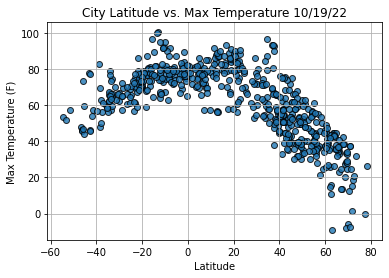

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


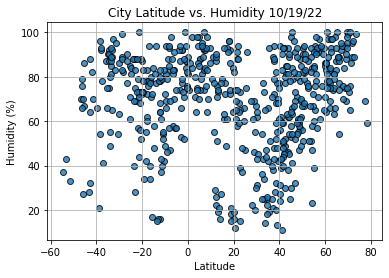

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

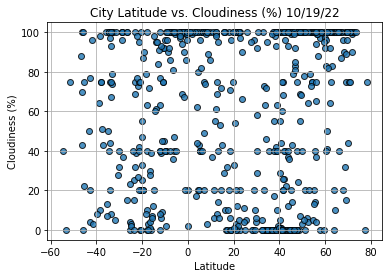

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

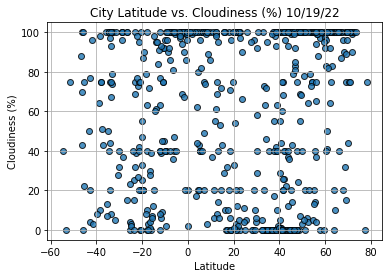

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

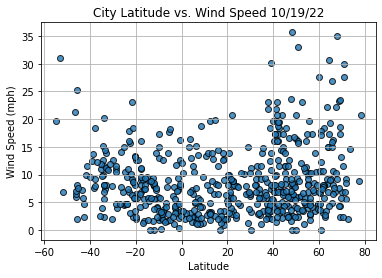

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()